In [592]:
#!pip install factor-analyzer
#!pip install advanced-pca
#!pip install rotate
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
#for plotting heatmaps
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from advanced_pca import CustomPCA
from sklearn import datasets
#from rotate import Varimax
np.set_printoptions(precision=3)

In [593]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [594]:
#load data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [595]:
# Select  variables for clustering
feature = ['CRIM','ZN','LSTAT','RM','AGE','INDUS','DIS','NOX','PTRATIO','B']
X = boston[feature]
y = boston['MEDV']

<AxesSubplot:>

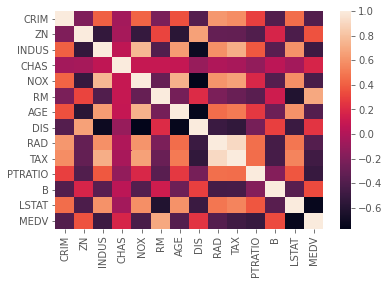

In [596]:
# visualiza correlation
import seaborn as sbn           
%matplotlib inline
sbn.heatmap(boston.corr())

In [597]:
# Spliit data into 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 10)
(152, 10)
(354,)
(152,)


In [598]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_train)
print(X_test.min(axis=0))
print(X_test.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [599]:
#Standarize X
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
np.mean(X_train),np.std(X_train)

(-9.032322912204664e-17, 1.0)

In [601]:
#Executive PCA on X_train 
pca = PCA()
train_PCA = pca.fit(X_train)
print("Variance explained by Components are: \n", train_PCA.explained_variance_)
print("Percent Variance explained by Components are:\n", train_PCA.explained_variance_ratio_)


Variance explained by Components are: 
 [4.919 1.204 1.003 0.782 0.695 0.432 0.408 0.221 0.184 0.179]
Percent Variance explained by Components are:
 [0.491 0.12  0.1   0.078 0.069 0.043 0.041 0.022 0.018 0.018]


### PCA Retention 

#### Choose PC = 2

The eigenvalues (variance explained by each PC) for PCs can help to retain the number of PCs. Generally, PCs with eigenvalues > 1 contributes greater variance and should be retained for further analysis

In [602]:
train_PCA.explained_variance_

array([4.919, 1.204, 1.003, 0.782, 0.695, 0.432, 0.408, 0.221, 0.184,
       0.179])

PC 1-4 have eigenvalues > 1 contributes greater variance. Look into further through Elbow rule on variance ratio.

We should keep the PCs where there is a sharp change in the slope of the line connecting adjacent PCs

<Figure size 720x480 with 0 Axes>

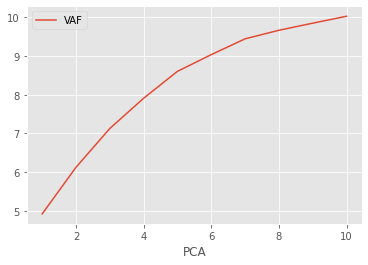

In [603]:
#Plot screeplot
plot_y = np.cumsum(train_PCA.explained_variance_)
plot_x = [*range(1,11,1)]
screeplot = pd.DataFrame({'PCA': plot_x, 'VAF': plot_y}, columns=['PCA', 'VAF'])
plt.figure(dpi=120)
lines = screeplot.plot.line(x='PCA', y='VAF')

<Figure size 720x480 with 0 Axes>

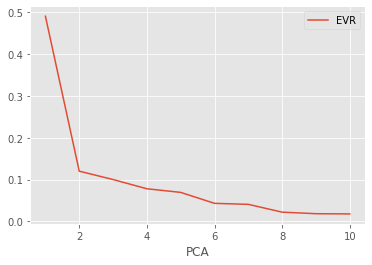

In [604]:
#Plot screeplot
plot_y = train_PCA.explained_variance_ratio_
plot_x = [*range(1,11,1)]
screeplot = pd.DataFrame({'PCA': plot_x, 'EVR': plot_y}, columns=['PCA', 'EVR'])
plt.figure(dpi=120)
lines = screeplot.plot.line(x='PCA', y='EVR')

We see a sharp point at PC2. Choose optimal PC = 2

### PCA Loadings

In [605]:
#Component loadings total
loadings = train_PCA.components_
num_pc = train_PCA.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = feature
loadings_df = loadings_df.set_index('variable')
loadings_df

## positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
CRIM,0.256271,-0.084872,0.478329,0.279758,0.676561,0.291891,0.220693,0.088201,0.092563,-0.109873
ZN,-0.314338,-0.068509,0.386185,0.460293,-0.011078,-0.547026,-0.301822,0.274731,-0.002503,0.263722
LSTAT,0.359406,-0.262772,0.037486,0.337745,-0.142215,0.185016,-0.394223,-0.615685,-0.132538,0.282489
RM,-0.222050,0.597858,0.296935,-0.356352,0.300018,-0.088426,-0.277602,-0.443315,-0.064291,0.050475
AGE,0.365218,0.256056,-0.149001,0.039793,0.016262,0.084140,-0.651969,0.345627,0.385745,-0.276770
INDUS,0.384567,0.031327,0.007105,-0.010682,-0.028315,-0.603259,0.319264,-0.320388,0.525589,-0.073607
DIS,-0.375638,-0.350826,0.135140,0.065190,-0.063777,-0.019227,-0.156324,-0.287893,0.081195,-0.771334
NOX,0.388082,0.251433,-0.006177,0.165534,-0.041269,-0.308566,0.064067,0.059516,-0.709022,-0.389176
PTRATIO,0.208476,-0.554244,0.074947,-0.610646,0.273803,-0.269940,-0.259044,0.126321,-0.182119,0.082351


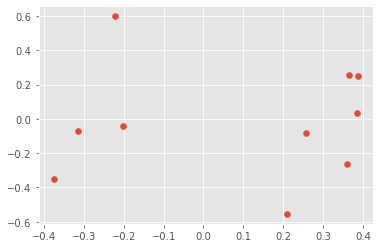

In [606]:
# Plot loadings PC1 VS.PC2
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])

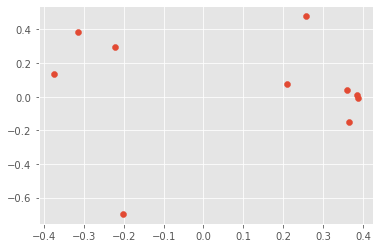

In [607]:
# Plot loadings PC1 VS.PC3
plt.scatter(loadings_df['PC1'], loadings_df['PC3'])

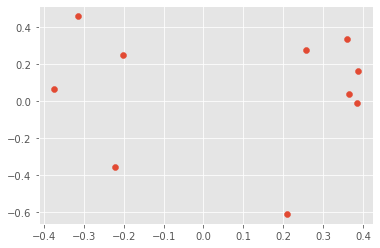

In [608]:
# Plot loadings PC1 VS.PC3
plt.scatter(loadings_df['PC1'], loadings_df['PC4'])

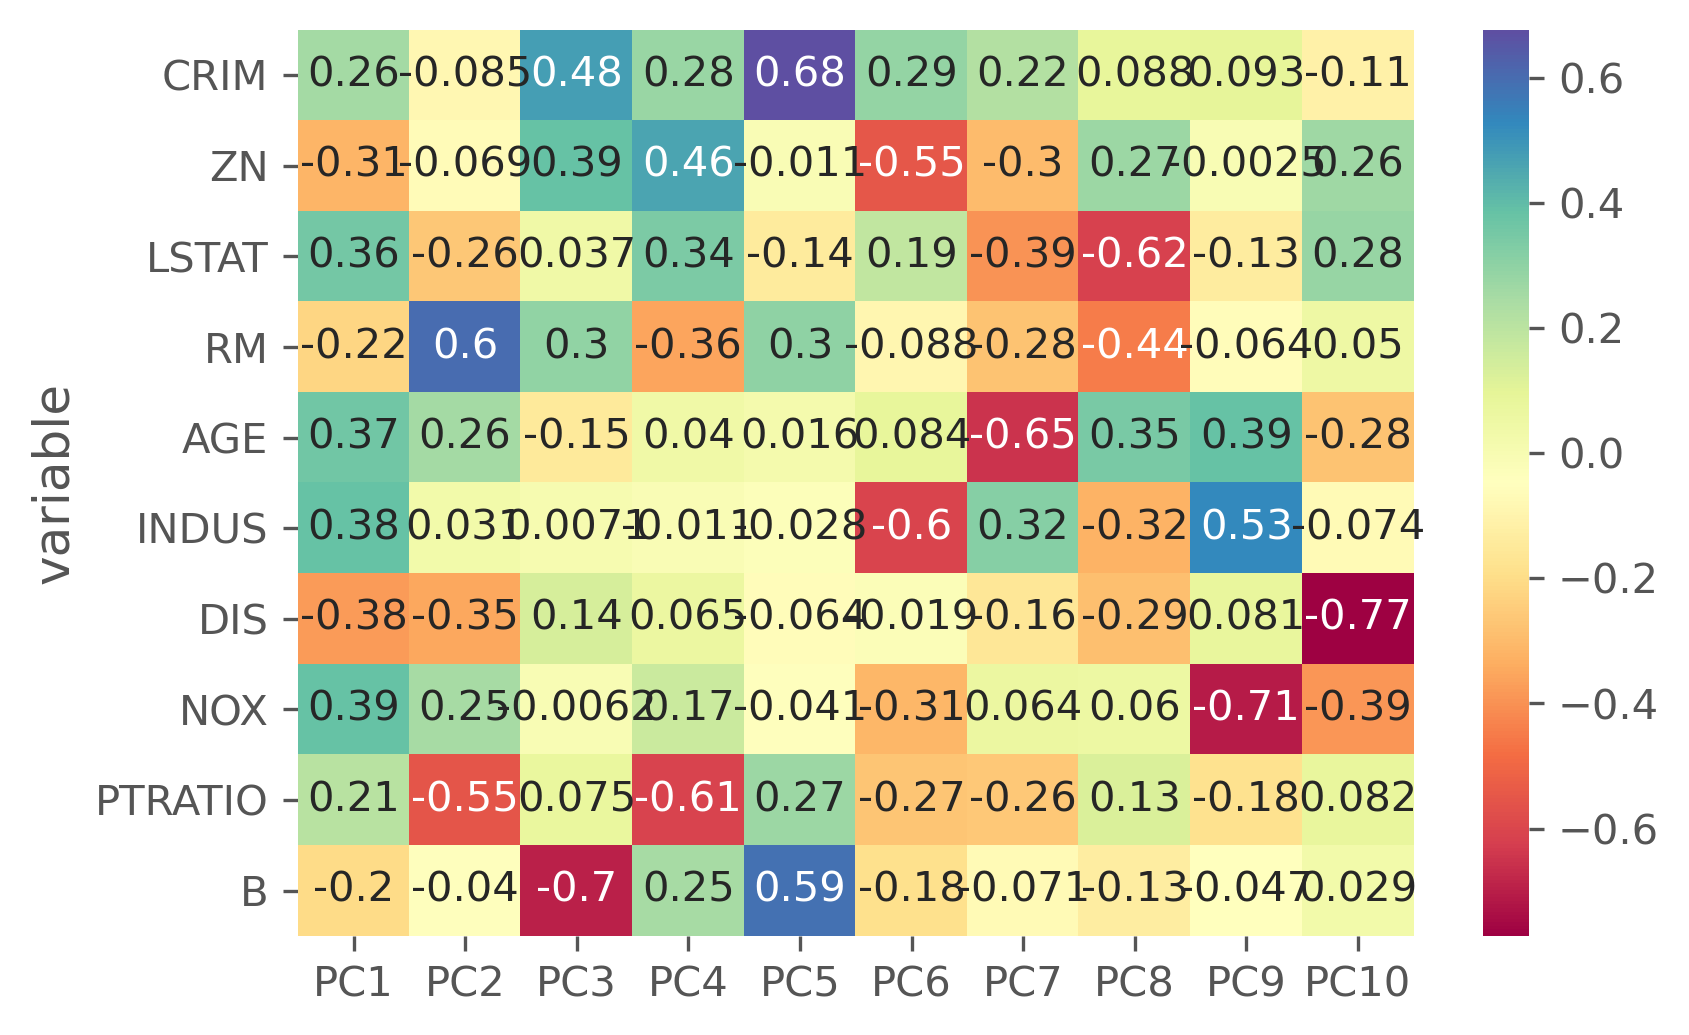

In [609]:
# All PC loadings in heatmap
plt.figure(dpi=300)
ax = sbn.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [610]:
#Component loadings Orthogonal - NO
CLo = train_PCA.components_.T *train_PCA.components_
CLo = CLo.round(1)
pd.DataFrame(CLo)

,0,1,2,3,4,5,6,7,8,9
0,0.1,0.0,0.2,-0.1,0.2,0.1,-0.1,0.0,0.0,0.0
1,0.0,0.0,-0.1,0.3,-0.0,-0.0,0.1,0.1,0.0,-0.0
2,0.2,-0.1,0.0,0.1,0.0,0.0,-0.1,0.0,-0.0,-0.2
3,-0.1,0.3,0.1,0.1,0.0,0.0,-0.0,-0.1,0.0,0.0
4,0.2,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.1,-0.2
5,0.1,-0.0,0.0,0.0,-0.0,0.4,-0.0,0.1,-0.1,0.0
6,-0.1,0.1,-0.1,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.1
7,0.0,0.1,0.0,-0.1,-0.0,0.1,-0.0,0.0,-0.1,0.1
8,0.0,0.0,-0.0,0.0,0.1,-0.1,-0.0,-0.1,0.0,-0.0
9,0.0,-0.0,-0.2,0.0,-0.2,0.0,0.1,0.1,-0.0,0.0


In [611]:
#Component Score Orthogonal - NO
pca_scores = np.asmatrix(PCA().fit_transform(X_train))
pca_scoresT =np.asmatrix(pca_scores.T)
score_orthogonal  = pca_scores * pca_scoresT
o = score_orthogonal.round()
o

matrix([[ 22.,  17.,   0., ...,  -1.,  -3., -11.],
        [ 17.,  14.,   0., ...,   0.,  -2.,  -9.],
        [  0.,   0.,   3., ...,  -1.,   0.,  -2.],
        ...,
        [ -1.,   0.,  -1., ...,   4.,   1.,  -0.],
        [ -3.,  -2.,   0., ...,   1.,   1.,   1.],
        [-11.,  -9.,  -2., ...,  -0.,   1.,  30.]])

In [612]:
#Function to check if matrix is orthogonal
def isOrthogonal(a, m, n) :
    if (m != n) :
        return False
     
    trans = [[0 for x in range(n)]
                for y in range(n)]
                 
    # Find transpose
    for i in range(0, n) :
        for j in range(0, n) :
            trans[i][j] = a[j][i]
             
    prod = [[0 for x in range(n)]
               for y in range(n)]
                
    # Find product of a[][]
    # and its transpose
    for i in range(0, n) :
        for j in range(0, n) :
     
            sum = 0
            for k in range(0, n) :
         
                # Since we are multiplying
                # with transpose of itself.
                # We use
                sum = sum + (a[i][k] *
                             a[j][k])
     
            prod[i][j] = sum
 
    # Check if product is
    # identity matrix
    for i in range(0, n) :
        for j in range(0, n) :
 
            if (i != j and prod[i][j] != 0) :
                return False
            if (i == j and prod[i][j] != 1) :
                return False
 
    return True

In [613]:
if (isOrthogonal(o,354,10)) :
    print ("Yes")
else :
    print ("No")

No


Both PC loadings and scores matrixes are not Orthogonal before factor analysis

### Bioplot on PC1 and PC2

In [614]:
#bioplot on X_train
pca = PCA()
x_new = pca.fit_transform(X_train)

def myplot(score,coeff,labels=feature):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(dpi=300)
    plt.scatter(xs * scalex,ys * scaley, c = Y_train)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


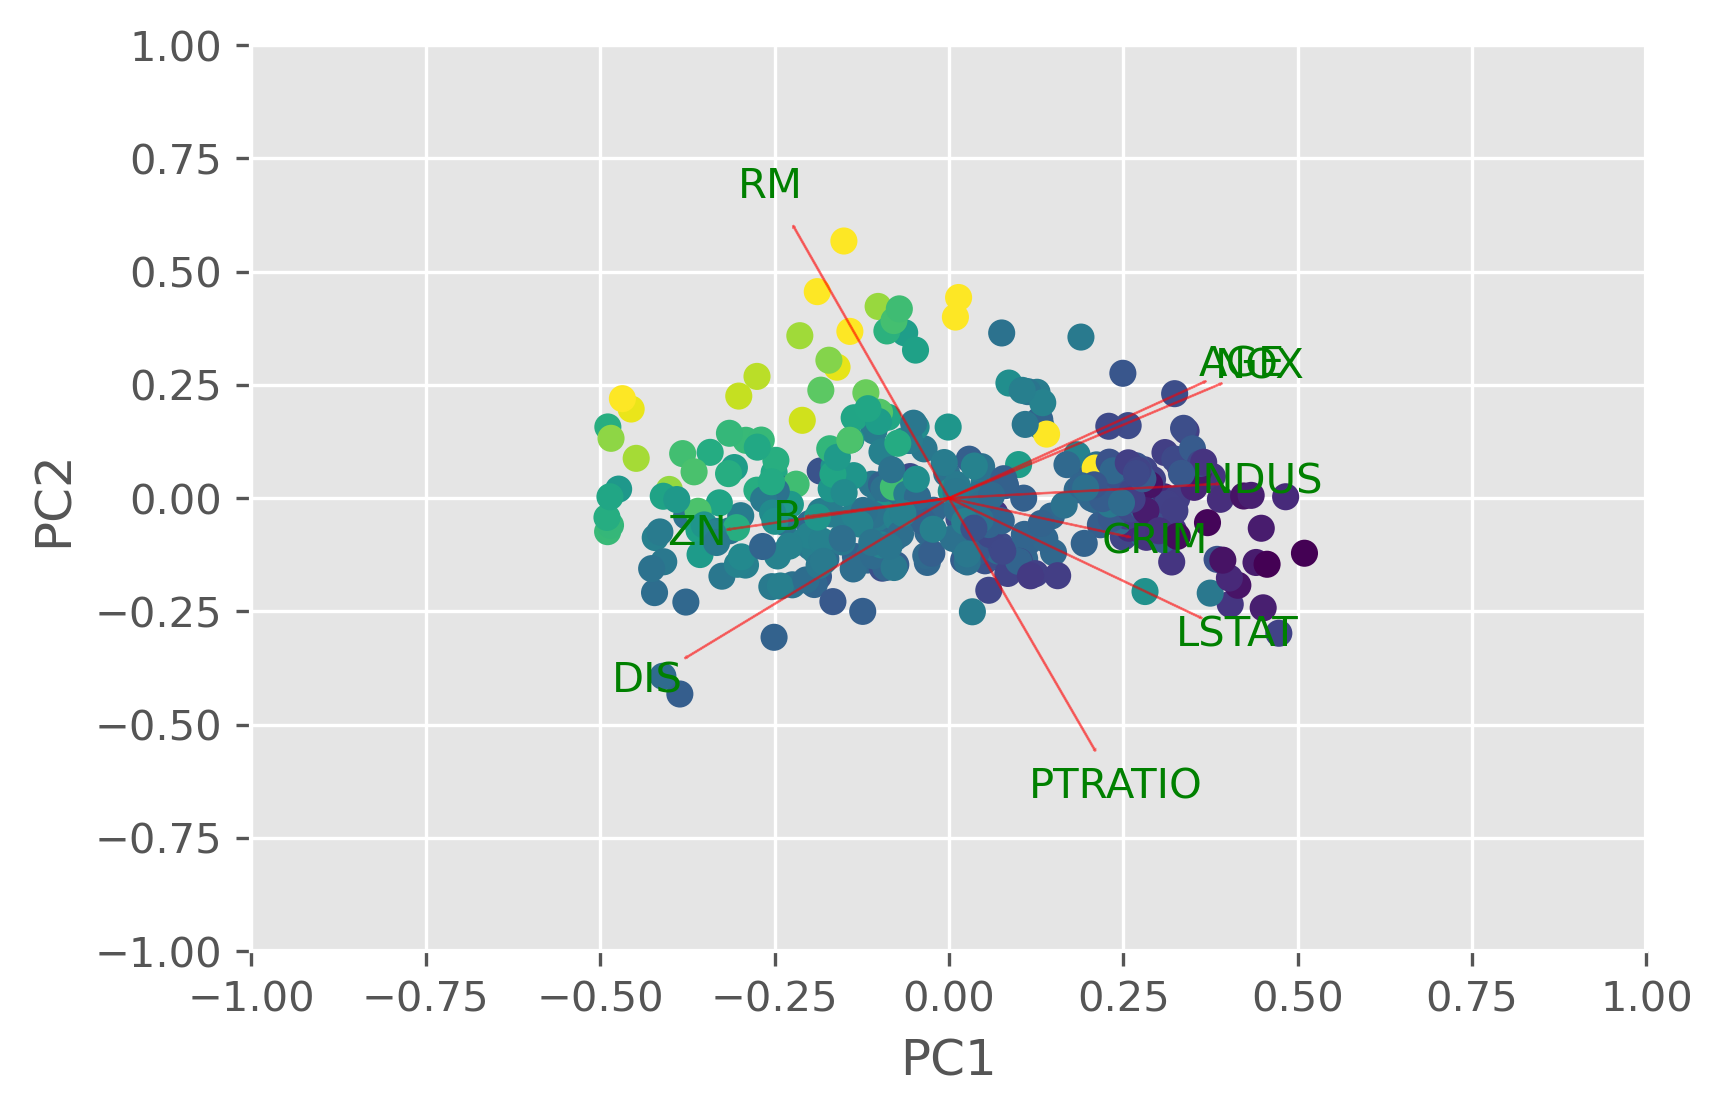

In [615]:
#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],train_PCA.components_.T[:, 0:2])

plt.grid()
plt.show()

### PCA interpretation 
From the biplot, we can see AGE, NOX are highly associated and forms cluster. Similarly, CRIME and LSTAT are highly associated and forms another cluster. ZN & B are highly associated. If the variables are highly associated, the angle between the variable vectors should be as small as possible in the biplot.
The length of PCs in biplot refers to the amount of variance contributed by the PCs. The longer the length of PC, the higher the variance contributed and well represented in space.

### Validate PCA (PC=2)

In [617]:
#Execute PCA on X_test
pca2 = PCA(n_components=2)
train_PCA2 = pca2.fit(X_train)
test_PCA = pca2.fit_transform(X_test)

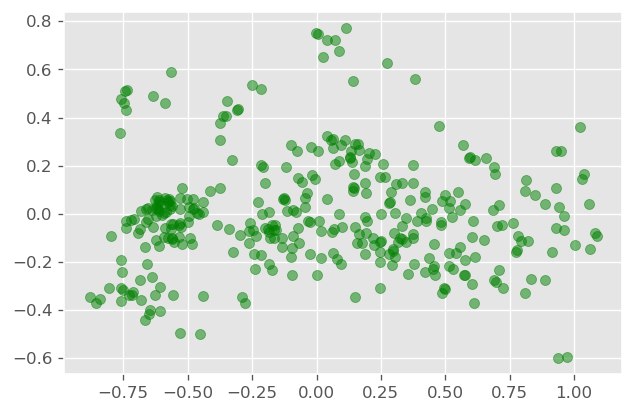

In [618]:
plt.figure(dpi=120)

plt.scatter(test_PCA[:,0], test_PCA[:,1], alpha = 0.5,color='g')

In [619]:
pca2_scores = np.asmatrix(test_PCA)
pca2_scoresT =np.asmatrix(pca2_scores.T)

pca2_trainloadingT = np.asmatrix(train_PCA2.components_.T)
pca2_trainloading = np.asmatrix(train_PCA2.components_)

In [620]:
# Calcualte test PCA score * training laodingT
test_score_train_load = pca2_scores * pca2_trainloading

In [621]:
#Calculate R sqaure
correlation_matrix = np.corrcoef(test_PCA[:,0], test_PCA[:,1])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
round(r_squared,2)

0.0

### Factor Analysis

In [ ]:
! pip install factor_analyzer

In [622]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer import (ConfirmatoryFactorAnalyzer, 
                             ModelSpecificationParser)

fa = FactorAnalyzer(rotation="varimax")

fa.fit(X_train)
print("The factor loadings after Varimax roation are \n", fa.loadings_)
print("The communalities are \n", fa.get_communalities())

fa2 = FactorAnalyzer(rotation="oblimax")

fa2.fit(X_train)
print("The factor loadings after Oblimax roation are \n", fa2.loadings_)
print("The communalities are \n", fa2.get_communalities())

The factor loadings after Varimax roation are 
 [[ 0.194  0.558  0.186]
 [-0.665 -0.055 -0.313]
 [ 0.347  0.508  0.599]
 [-0.131 -0.051 -0.806]
 [ 0.711  0.34   0.19 ]
 [ 0.589  0.474  0.338]
 [-0.887 -0.307 -0.076]
 [ 0.699  0.504  0.175]
 [ 0.138  0.222  0.425]
 [-0.16  -0.464 -0.074]]
The communalities are 
 [0.384 0.543 0.737 0.669 0.657 0.685 0.887 0.774 0.248 0.246]
The factor loadings after Oblimax roation are 
 [[ 0.512  0.063  0.343]
 [-0.656  0.068  0.33 ]
 [ 0.778  0.341  0.124]
 [-0.473 -0.627  0.227]
 [ 0.783 -0.197 -0.074]
 [ 0.826 -0.007  0.056]
 [-0.846  0.385  0.15 ]
 [ 0.852 -0.204  0.076]
 [ 0.401  0.296  0.017]
 [-0.39   0.017 -0.307]]
The communalities are 
 [0.384 0.543 0.737 0.669 0.657 0.685 0.887 0.774 0.248 0.246]


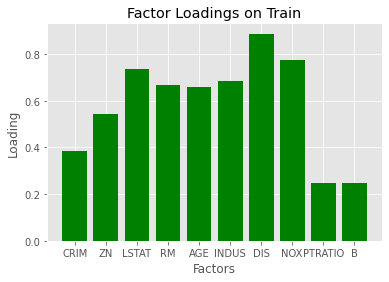

In [623]:
plt.style.use('ggplot')

a = feature
b = fa.get_communalities()

x_pos = [i for i, _ in enumerate(a)]

plt.bar(x_pos, b, color='green')
plt.xlabel("Factors")
plt.ylabel("Loading")
plt.title("Factor Loadings on Train")

plt.xticks(x_pos, a)

plt.show()

From the factor analysis, I see different clusters. (PTRATIO,B),(RM,AGE,INDUS),(DIS,NOX),(LSTAT),(CRIM,ZN)

Name the cluster/group based on above factor analysis:

In [624]:
model_dict = {"Population": ["AGE", "RM","INDUS"], 
              "Crime": ["CRIM","ZN"],
            "Zone": ["B","PTRATIO"],
        "Distance": ["DIS","NOX"],
    "LowStatus":["LSTAT"]}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(X_train,
                                                                          model_dict)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)


In [625]:
cfa.fit(X_train)
print("The CFA Loadings are \n", cfa.loadings_)
print("The Variance-Covariance of factors are \n", cfa.factor_varcovs_)
print("The fit.transform matrix produced is \n", cfa.transform(X_train))


The CFA Loadings are 
 [[ 0.663  0.     0.     0.     0.   ]
 [-0.468  0.     0.     0.     0.   ]
 [ 0.613  0.     0.     0.     0.   ]
 [ 0.    -0.066  0.     0.     0.   ]
 [ 0.     0.283  0.     0.     0.   ]
 [ 0.     0.     0.138  0.     0.   ]
 [ 0.     0.    -0.246  0.     0.   ]
 [ 0.     0.     0.     0.638  0.   ]
 [ 0.     0.     0.     0.37   0.   ]
 [ 0.     0.     0.     0.     0.767]]
The Variance-Covariance of factors are 
 [[ 1.000e+00  1.526e-01  2.407e-01  1.132e+00 -4.346e-01]
 [ 1.526e-01  1.000e+00 -6.392e-02  3.582e-01 -1.265e-01]
 [ 2.407e-01 -6.392e-02  1.000e+00  2.785e-01  6.808e-04]
 [ 1.132e+00  3.582e-01  2.785e-01  1.000e+00 -5.727e-01]
 [-4.346e-01 -1.265e-01  6.808e-04 -5.727e-01  1.000e+00]]
The fit.transform matrix produced is 
 [[  1.82    3.115   4.7     2.501  -4.517]
 [  1.284   1.397   4.778   1.834  -3.746]
 [ -0.131   0.465   2.699   0.227   0.508]
 ...
 [  0.249  -3.935   1.195   0.554   0.512]
 [ -0.352  -1.773  -0.877  -0.648   0.534]
 [ -1

C:\Users\Sijie Li\anaconda3\lib\site-packages\factor_analyzer\confirmatory_factor_analyzer.py:732: UserWarning: The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn('The optimization routine failed '
